In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [16]:
# rebuild the index of transition matrix
rows=[]
for price_relation_d in range(6):
    for s1_imb_d in range(3):
        for s2_imb_d in range(3):
            s1_imb_d, s2_imb_d, price_relation_d = str(s1_imb_d),str(s2_imb_d),str(price_relation_d)
            rows.append(price_relation_d+s1_imb_d+s2_imb_d)

In [17]:
markov_adj=pd.read_csv('Markov_exp_move.csv',index_col=0)
markov_adj.index=rows
simu_move=pd.read_csv('simulated_exp_dp.csv',index_col=0)
simu_move.index=rows
markov_adj.columns=simu_move.columns

## Compare simulated price movement and Markov adjustment

In [18]:
diff=markov_adj-simu_move
diff

,exp_dp1,exp_dp2
000,0.000000,0.000000
001,0.000000,0.000000
002,0.000000,0.000000
010,-0.000649,-0.001723
011,0.000995,0.000848
012,0.000000,0.000000
020,0.000286,-0.000047
021,-0.000295,-0.000862
022,0.000000,0.000000
100,0.000000,0.000000


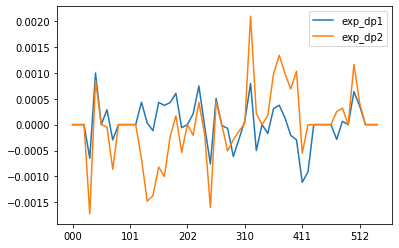

In [19]:
diff.plot()

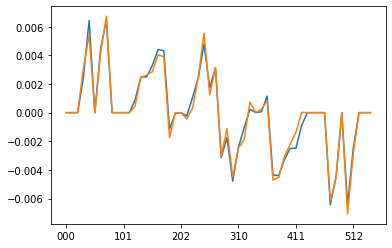

In [20]:
markov_adj.exp_dp1.plot()
simu_move.exp_dp1.plot()

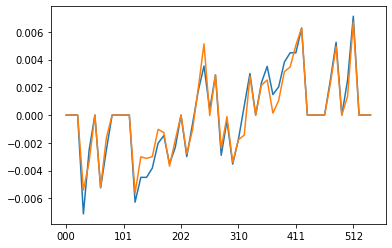

In [21]:
markov_adj.exp_dp2.plot()
simu_move.exp_dp2.plot()

In [22]:
diff.to_csv('markov_minus_simulated.csv')

## Plot expected price movement vs its imbalance for each residual state
### Markov estimation
#### Given the other imbalance state = 1

In [23]:
markov_adj['state']=rows
markov_adj[['res_state','imb1_state','imb2_state']] = markov_adj['state'].str.split('',expand=True).loc[:,1:3].astype('int32')
markov_adj.set_index(['res_state','imb1_state','imb2_state'],inplace=True)

ValueError: split() requires a non-empty pattern match.

In [14]:
markov_adj.xs(1,level='imb2_state').exp_dp1.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 1')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 1')
plt.title('Given imb2_state=1, imb1_state vs exp_dp1 for each residual state')

AttributeError: 'Index' object has no attribute 'get_loc_level'

In [10]:
markov_adj.xs(1,level='imb1_state').exp_dp2.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 2')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 2')
plt.title('Given imb1_state=1, imb2_state vs exp_dp2 for each residual state')

AttributeError: 'Index' object has no attribute 'get_loc_level'

#### averaging the other imbalance

In [11]:
markov_adj.droplevel(2).groupby(['res_state','imb1_state']).mean().exp_dp1.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 1')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 1')
plt.title('Averaging imb2_state, imb1_state vs exp_dp1 for each residual state')

IndexError: Too many levels: Index has only 1 level, not 3

Text(0.5, 1.0, 'Averaging imb1_state, imb2_state vs exp_dp2 for each residual state')

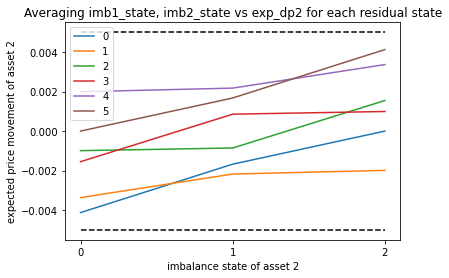

In [95]:
markov_adj.droplevel(1).groupby(['res_state','imb2_state']).mean().exp_dp2.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 2')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 2')
plt.title('Averaging imb1_state, imb2_state vs exp_dp2 for each residual state')

### Simulated estimation
#### Given the other imbalance state = 1

In [75]:
simu_move['state']=rows
simu_move[['res_state','imb1_state','imb2_state']] = simu_move['state'].str.split('',expand=True).loc[:,1:3].astype('int32')
simu_move.set_index(['res_state','imb1_state','imb2_state'],inplace=True)

Text(0.5, 1.0, 'Given imb2_state=1, imb1_state vs exp_dp1 for each residual state')

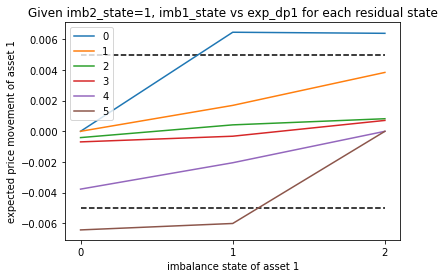

In [76]:
simu_move.xs(1,level='imb2_state').exp_dp1.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 1')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 1')
plt.title('Given imb2_state=1, imb1_state vs exp_dp1 for each residual state')  

Text(0.5, 1.0, 'Given imb1_state=1, imb2_state vs exp_dp2 for each residual state')

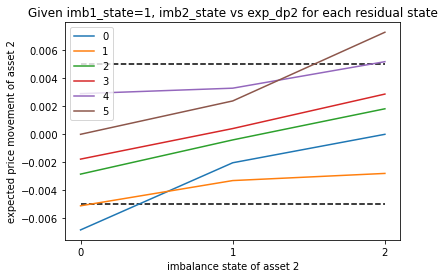

In [77]:
simu_move.xs(1,level='imb1_state').exp_dp2.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 2')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 2')
plt.title('Given imb1_state=1, imb2_state vs exp_dp2 for each residual state')

#### averaging the other imbalance

Text(0.5, 1.0, 'Averaging imb2_state, imb1_state vs exp_dp1 for each residual state')

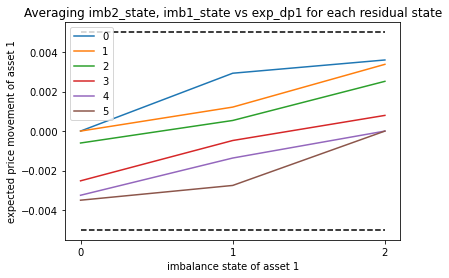

In [96]:
simu_move.droplevel(2).groupby(['res_state','imb1_state']).mean().exp_dp1.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 1')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 1')
plt.title('Averaging imb2_state, imb1_state vs exp_dp1 for each residual state')

Text(0.5, 1.0, 'Averaging imb1_state, imb2_state vs exp_dp2 for each residual state')

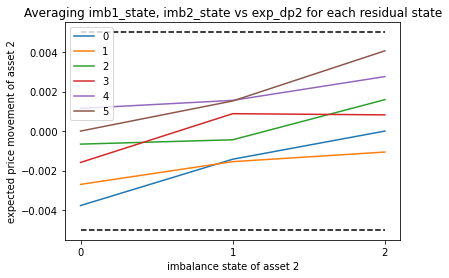

In [97]:
simu_move.droplevel(1).groupby(['res_state','imb2_state']).mean().exp_dp2.groupby('res_state').plot()
plt.hlines([-0.005,0.005],0,2,colors='k',linestyles='dashed')
plt.legend()
plt.xlabel('imbalance state of asset 2')
plt.xticks(range(3),labels=[0,1,2])
plt.ylabel('expected price movement of asset 2')
plt.title('Averaging imb1_state, imb2_state vs exp_dp2 for each residual state')